In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor as KNN
%matplotlib inline

import pandas as pd
import numpy as np
import os, random

In [2]:
def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')

def GetPandasFromFile(path, theSkipRow):
    return pd.read_csv(path, skiprows= theSkipRow , header=None)

In [3]:
df = GetPandasFromFileCSV("[dataFinal]/_RentPriceTruliaMergeFinal.csv")
print df.shape
print df.head(3)
print df.columns.values

(13049, 47)
   pixelPlant  pixelPole  pixelLake  pixelRoad  pixelGrass  pixelWall  \
0         0.0      0.000      60.99      2.671         0.0      2.116   
1         0.0      0.004      34.12      0.217         0.0      4.409   
2         0.0      0.000       0.00      0.000         0.0      0.000   

   pixelCar  propertiesAsses  pixelSea  numCraigslistHouse   ...    pixelSky  \
0     6.639        142585895       0.0                   0   ...       18.16   
1    22.560        173725104       0.0                   0   ...       27.81   
2     0.000        243090896       0.0                   0   ...        0.00   

    Latitude  Longitude                          Address   Zip  RoomType  \
0  42.358550 -71.064780  37 Mount Vernon #4 Boston 02108  2108         3   
1  42.356533 -71.070305          3 Byron St Boston 02108  2108         3   
2  42.355400 -71.061510         3 Winter Pl Boston 02108  2108         2   

   Bathrooms  SQFT         SQM   Price  
0        2.0  1425  132.3867

In [4]:
for col in df.columns:
    print col,len(df[df[col].isnull()])

pixelPlant 0
pixelPole 0
pixelLake 0
pixelRoad 0
pixelGrass 0
pixelWall 0
pixelCar 0
propertiesAsses 0
pixelSea 0
numCraigslistHouse 0
pixelRiver 0
pixelBus 0
pixelCeiling 0
pixelPath 0
pixelBuilding 0
crime 0
pixelFence 0
walkSchool 0
walkMbta 0
energySiteEUI 0
pixelPerson 0
pixelTree 0
pixelVan 0
walkPark 0
walkUniversity 0
pixelSidewalk 0
pixelGround 0
pixelMountain 0
pixelPalmTree 0
pixelHouse 0
pixelBridge 0
pixelSign 0
pixelRailing 0
pixelField 0
pixelWindow 0
pixelGrandstand 0
numCraigslistRoom 0
pixelSky 0
Latitude 0
Longitude 0
Address 0
Zip 0
RoomType 995
Bathrooms 125
SQFT 8630
SQM 0
Price 27


In [5]:
data = df.convert_objects(convert_numeric=True)

to_float = []
to_encode = []
for col in data.columns:
    if data[col].dtype =='object':
        to_encode.append(col);
    if data[col].dtype =='int64':
        to_float.append(col);
    print col,data[col].dtype
        
print to_float
print "----------------------"
print to_encode

for feature_name in to_float:
    data[feature_name] = data[feature_name].astype(float)

def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Categorical columns for use in one-hot encoder
categorical = (data.dtypes.values != np.dtype('float64'))

# Encode all labels
data = data.apply(encode_categorical)

pixelPlant float64
pixelPole float64
pixelLake float64
pixelRoad float64
pixelGrass float64
pixelWall float64
pixelCar float64
propertiesAsses int64
pixelSea float64
numCraigslistHouse int64
pixelRiver float64
pixelBus float64
pixelCeiling float64
pixelPath float64
pixelBuilding float64
crime int64
pixelFence int64
walkSchool int64
walkMbta int64
energySiteEUI float64
pixelPerson float64
pixelTree float64
pixelVan float64
walkPark int64
walkUniversity int64
pixelSidewalk float64
pixelGround float64
pixelMountain float64
pixelPalmTree float64
pixelHouse float64
pixelBridge float64
pixelSign float64
pixelRailing float64
pixelField float64
pixelWindow float64
pixelGrandstand float64
numCraigslistRoom int64
pixelSky float64
Latitude float64
Longitude float64
Address object
Zip int64
RoomType float64
Bathrooms float64
SQFT float64
SQM float64
Price float64
['propertiesAsses', 'numCraigslistHouse', 'crime', 'pixelFence', 'walkSchool', 'walkMbta', 'walkPark', 'walkUniversity', 'numCraigslistR

C:\Users\EllieHan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [6]:
data.head()

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,...,pixelSky,Latitude,Longitude,Address,Zip,RoomType,Bathrooms,SQFT,SQM,Price
0,0.0,0.000,60.99,2.671,0.0,2.116,6.639,142585895.0,0.0,0.0,...,18.16,42.358550,-71.064780,4755,2108.0,3.0,2.0,1425.0,132.386775,4250.0
1,0.0,0.004,34.12,0.217,0.0,4.409,22.560,173725104.0,0.0,0.0,...,27.81,42.356533,-71.070305,4058,2108.0,3.0,3.5,2500.0,232.257500,9500.0
2,0.0,0.000,0.00,0.000,0.0,0.000,0.000,243090896.0,0.0,0.0,...,0.00,42.355400,-71.061510,4096,2108.0,2.0,2.5,2250.0,209.031750,8500.0
3,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815.0,0.0,0.0,...,24.04,42.356464,-71.061760,6249,2108.0,4.0,2.0,1325.0,123.096475,7200.0
4,0.0,0.000,37.65,1.242,0.0,0.694,0.020,216929815.0,0.0,0.0,...,24.04,42.356464,-71.061760,6242,2108.0,2.0,1.0,750.0,69.677250,3800.0


In [7]:
data.dropna(axis=0,subset=['RoomType','Price','Bathrooms'],inplace=True)
data.shape

(11569, 47)

In [8]:
k=4
knntest = data[data['SQFT'].isnull()]
knntrain = data[data['SQFT'].isnull()==False]

xknn_train = knntrain[['RoomType','Bathrooms','Longitude','Latitude','Zip']].values
yknn_train = knntrain['SQFT'].values

xknn_test = knntest[['RoomType','Bathrooms','Longitude','Latitude','Zip']].values
neighbours = KNN(n_neighbors=k)
neighbours.fit(xknn_train, yknn_train)
yknn_test = neighbours.predict(xknn_test)

data.set_value( data['SQFT'].isnull(),'SQFT',yknn_test)

print data.columns.values


['pixelPlant' 'pixelPole' 'pixelLake' 'pixelRoad' 'pixelGrass' 'pixelWall'
 'pixelCar' 'propertiesAsses' 'pixelSea' 'numCraigslistHouse' 'pixelRiver'
 'pixelBus' 'pixelCeiling' 'pixelPath' 'pixelBuilding' 'crime' 'pixelFence'
 'walkSchool' 'walkMbta' 'energySiteEUI' 'pixelPerson' 'pixelTree'
 'pixelVan' 'walkPark' 'walkUniversity' 'pixelSidewalk' 'pixelGround'
 'pixelMountain' 'pixelPalmTree' 'pixelHouse' 'pixelBridge' 'pixelSign'
 'pixelRailing' 'pixelField' 'pixelWindow' 'pixelGrandstand'
 'numCraigslistRoom' 'pixelSky' 'Latitude' 'Longitude' 'Address' 'Zip'
 'RoomType' 'Bathrooms' 'SQFT' 'SQM' 'Price']


In [9]:
data.shape

(11569, 47)

In [10]:
data["PricePerSQM"] = data["Price"]/(data["SQFT"]*0.09290304)
data["PricePerSQM"].describe()

count    11569.000000
mean        29.440228
std         25.720273
min          1.399448
25%         21.961267
50%         27.621903
75%         34.795494
max       2454.311821
Name: PricePerSQM, dtype: float64

In [11]:
data = data.drop('Address',1)
data = data.drop('Price',1)
data['pixelSea'] = data['pixelRiver']+data['pixelLake']+data['pixelSea']
data.rename(columns={'pixelRiver':'pixelWater'}, inplace=True)
data = data.drop('pixelLake',1)
data = data.drop('pixelSea',1)
data = data.drop('SQFT',1)
data = data.drop('SQM',1)

In [12]:
data.head()
datacon=data

In [13]:
datacon = datacon[(datacon['PricePerSQM']>150) == False]

Y = datacon["PricePerSQM"].values

# 25%         21.961267
# 50%         27.621903
# 75%         34.795494
# Y = np.array([1 if y>=40 else 0 for y in Y])
# Y = np.array([2 if y>=40 1 if 20<y<40 else 0 for y in Y])
# Y = np.array([2 if y >= 40 else 1 if y < 20 else 0 for y in Y])
Y = [(2 if y >= 35 else (1 if 22<y<35  else 0)) for y in Y]
# print Y


# data['target'] = (data["PricePerSQM"].values >=40)*1
datacon['target'] = Y
print datacon.head(5)



y_new = datacon["PricePerSQM"]
y = datacon["target"].values
x = datacon.values
print y

   pixelPlant  pixelPole  pixelRoad  pixelGrass  pixelWall  pixelCar  \
0         0.0      0.000      2.671         0.0      2.116     6.639   
1         0.0      0.004      0.217         0.0      4.409    22.560   
2         0.0      0.000      0.000         0.0      0.000     0.000   
3         0.0      0.000      1.242         0.0      0.694     0.020   
4         0.0      0.000      1.242         0.0      0.694     0.020   

   propertiesAsses  numCraigslistHouse  pixelWater  pixelBus   ...    \
0      142585895.0                 0.0         0.0       0.0   ...     
1      173725104.0                 0.0         0.0       0.0   ...     
2      243090896.0                 0.0         0.0       0.0   ...     
3      216929815.0                 0.0         0.0       0.0   ...     
4      216929815.0                 0.0         0.0       0.0   ...     

   pixelGrandstand  numCraigslistRoom  pixelSky   Latitude  Longitude     Zip  \
0              0.0                0.0     18.16  42.3

C:\Users\EllieHan\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
datacon = datacon.drop("PricePerSQM",1)
datacon = datacon.drop('pixelFence',1)



In [15]:
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from IPython.display import Image
import pydotplus



from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import tree

C:\Users\EllieHan\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\EllieHan\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [16]:
# COLOR STUFF 
from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [17]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
# indf - Input dataframe
# featurenames - vector of names of predictors
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# mask - boolean vector indicating test set (~mask is training set)
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [18]:
# A generic function to do CV
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)

    best = gs.best_estimator_
    return best
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Plot tree containing only two covariates
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clf.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)

In [19]:
# This function creates images of tree models using pydotplus
# https://github.com/JWarmenhoven/ISLR-python
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO.StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, proportion=True, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [20]:
# Print decision tree model 'dt'
def display_dt(dt):
    dummy_io = StringIO.StringIO() 
    tree.export_graphviz(dt, out_file = dummy_io, proportion=True) 
    print dummy_io.getvalue()

In [21]:
# Create test/train mask
ddd =xrange(datacon.shape[0])
itrain, itest = train_test_split(xrange(datacon.shape[0]), train_size=0.6)

mask=np.ones(datacon.shape[0], dtype='int')

mask[itrain]=1
mask[itest]=0
mask = (mask==1)

# make sure we didn't get unlucky in our mask selection
print "% PricePerSQM in Training:", np.mean(datacon.target[mask]), np.std((datacon.target[mask]))
print "% PricePerSQM in Testing:", np.mean(datacon.target[~mask]), np.std((datacon.target[~mask]))


% PricePerSQM in Training: 1.0036033439 0.706689805281
% PricePerSQM in Testing: 0.974924340683 0.700362950732


In [22]:
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from IPython.display import Image
import pydotplus



from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import tree

# I NEED THIS SOMEHOW
import StringIO
#
clfTree1 = tree.DecisionTreeClassifier(max_depth=5, criterion='gini') 

xIndex = ['Latitude','Longitude','pixelWall' ,'propertiesAsses', 'pixelWater', 'pixelBus' ,'pixelCeiling',
 'pixelBuilding', 'crime', 'walkSchool' ,'walkMbta' ,'walkPark',
 'walkUniversity' ,'pixelBridge' ,'pixelField', 'pixelSky' ,'Longitude' ,'Zip',
 'RoomType', 'Bathrooms']

MyNames = ['Longitude','Latitude']
subdf=datacon[xIndex]
X=subdf.values
y=datacon['target'].values

# TRAINING AND TESTING
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]

# FIT THE TREE 
clf=clfTree1.fit(Xtrain, ytrain)

training_accuracy = clf.score(Xtrain, ytrain)
test_accuracy = clf.score(Xtest, ytest)
print "############# based on standard predict ################"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)
print confusion_matrix(ytest, clf.predict(Xtest))
print "########################################################"

############# based on standard predict ################
Accuracy on training data: 0.67
Accuracy on test data:     0.66
[[ 376  796   22]
 [ 118 2052  184]
 [  10  421  647]]
########################################################


In [23]:
import StringIO
def GetTreeWithScore(indexA, indexB):
    clfTree1 = tree.DecisionTreeClassifier(max_depth=3, criterion='gini')
    MyNames = [indexA,indexB]
    subdf=datacon[MyNames]
    X=subdf.values
    y=datacon['target']

    # TRAINING AND TESTING
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]

    # FIT THE TREE 
    clf=clfTree1.fit(Xtrain, ytrain)

    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    result = (clf, training_accuracy,training_accuracy, indexA, indexB )
    return result
xIndex = ['Latitude','Longitude','pixelWall', 'pixelWater', 'pixelBus' ,'pixelCeiling',
 'pixelBuilding', 'crime', 'walkSchool' ,'walkMbta' ,'walkPark',
 'walkUniversity' ,'pixelBridge' ,'pixelField', 'pixelSky' ,'Longitude' ,'Zip',
 'RoomType', 'Bathrooms']
theResults =[]
for i in xIndex:
    for j in xIndex:
        if i != j : 
            results = GetTreeWithScore(i,j)
            theResults.append(results)
print "done"

done


In [24]:
theResults.sort(key=lambda tup: tup[1], reverse=True)
for i in theResults:
    print "training score:",i[1]," testing score: ", i[2], i[3], i[4]
    

training score: 0.649610838858  testing score:  0.649610838858 Latitude Zip
training score: 0.649610838858  testing score:  0.649610838858 Zip Latitude
training score: 0.646728163736  testing score:  0.646728163736 Longitude Zip
training score: 0.646728163736  testing score:  0.646728163736 Longitude Zip
training score: 0.646728163736  testing score:  0.646728163736 Zip Longitude
training score: 0.646728163736  testing score:  0.646728163736 Zip Longitude
training score: 0.64398962237  testing score:  0.64398962237 pixelBus Zip
training score: 0.64398962237  testing score:  0.64398962237 Zip pixelBus
training score: 0.643701354857  testing score:  0.643701354857 Zip RoomType
training score: 0.643701354857  testing score:  0.643701354857 RoomType Zip
training score: 0.642404151052  testing score:  0.642404151052 pixelBuilding Zip
training score: 0.642404151052  testing score:  0.642404151052 Zip pixelBuilding
training score: 0.642260017296  testing score:  0.642260017296 pixelField Zip


In [25]:
newpd = pd.DataFrame()

newpd

""


In [26]:
display_dt(clf)

digraph Tree {
node [shape=box] ;
0 [label="X[17] <= 2117.0\ngini = 0.6247\nsamples = 100.0%\nvalue = [0.25, 0.5, 0.25]"] ;
1 [label="X[11] <= 20.5\ngini = 0.3852\nsamples = 20.4%\nvalue = [0.03, 0.22, 0.75]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= -71.0807\ngini = 0.2549\nsamples = 9.1%\nvalue = [0.03, 0.11, 0.86]"] ;
1 -> 2 ;
3 [label="X[9] <= 54.5\ngini = 0.1977\nsamples = 7.4%\nvalue = [0.01, 0.1, 0.89]"] ;
2 -> 3 ;
4 [label="X[19] <= 1.25\ngini = 0.1874\nsamples = 7.4%\nvalue = [0.01, 0.1, 0.9]"] ;
3 -> 4 ;
5 [label="gini = 0.1336\nsamples = 5.8%\nvalue = [0.0, 0.07, 0.93]"] ;
4 -> 5 ;
6 [label="gini = 0.3568\nsamples = 1.5%\nvalue = [0.01, 0.22, 0.77]"] ;
4 -> 6 ;
7 [label="X[18] <= 2.5\ngini = 0.4444\nsamples = 0.1%\nvalue = [0.0, 0.67, 0.33]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 0.0%\nvalue = [0.0, 1.0, 0.0]"] ;
7 -> 8 ;
9 [label="gini = 0.4444\nsamples = 0.0%\nvalue = [0.0, 0.33, 0.67]"] ;
7 -> 9 ;
10 [label="X[12] <= 12.5\ngin

In [27]:
parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [ 1,2, 3, 4, 5, 6]}
clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=10, n_folds=3, score_func=None);

print clf.max_depth, clf.min_samples_leaf


1 1


In [28]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]} # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, datacon, 
                                                     xIndex,'target', 1, 
                                                     mask=mask, n_jobs = 1, score_func = 'f1')
print clf.max_depth, clf.min_samples_leaf

using mask


C:\Users\EllieHan\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


############# based on standard predict ################
Accuracy on training data: 0.62
Accuracy on test data:     0.62
[[ 718 1554]
 [ 221 2133]]
########################################################
1 1


In [29]:
from sklearn.ensemble import RandomForestClassifier
import StringIO

i = 2
clfForest = RandomForestClassifier( n_estimators=i, oob_score=True, max_features='auto')

subdf=datacon[xIndex]
X=subdf.values
y=(datacon['target'].values==1)*1

# TRAINING AND TESTING
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]

# FIT THE TREE 
clf=clfForest.fit(Xtrain, ytrain)

print clfForest.n_estimators

training_accuracy = clfForest.score(Xtrain, ytrain)
test_accuracy = clfForest.score(Xtest, ytest)
print "############# based on standard predict ################"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)
print confusion_matrix(ytest, clf.predict(Xtest))
print "########################################################"

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       datacon, xIndex, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')
print clfForest.n_estimators

print cv_optimize(clfForest, parameters, Xtrain, ytrain, n_jobs=4, n_folds=5, score_func=None)

2
############# based on standard predict ################
Accuracy on training data: 0.89
Accuracy on test data:     0.75
[[1932  340]
 [ 833 1521]]
########################################################
using mask


C:\Users\EllieHan\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\EllieHan\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


############# based on standard predict ################
Accuracy on training data: 0.88
Accuracy on test data:     0.73
[[1689  583]
 [ 643 1711]]
########################################################
1
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=11, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)


[  1.93661545e-01   1.51843463e-01   2.49920222e-02   4.55829444e-03
   8.33159455e-03   7.59014609e-03   9.74776784e-03   1.85693775e-02
   2.57475790e-02   1.10912682e-02   3.44027111e-02   1.06564285e-02
   1.56324917e-02   2.51650761e-05   2.26982180e-02   1.61958411e-01
   1.44994723e-01   9.14897065e-02   6.20090869e-02]


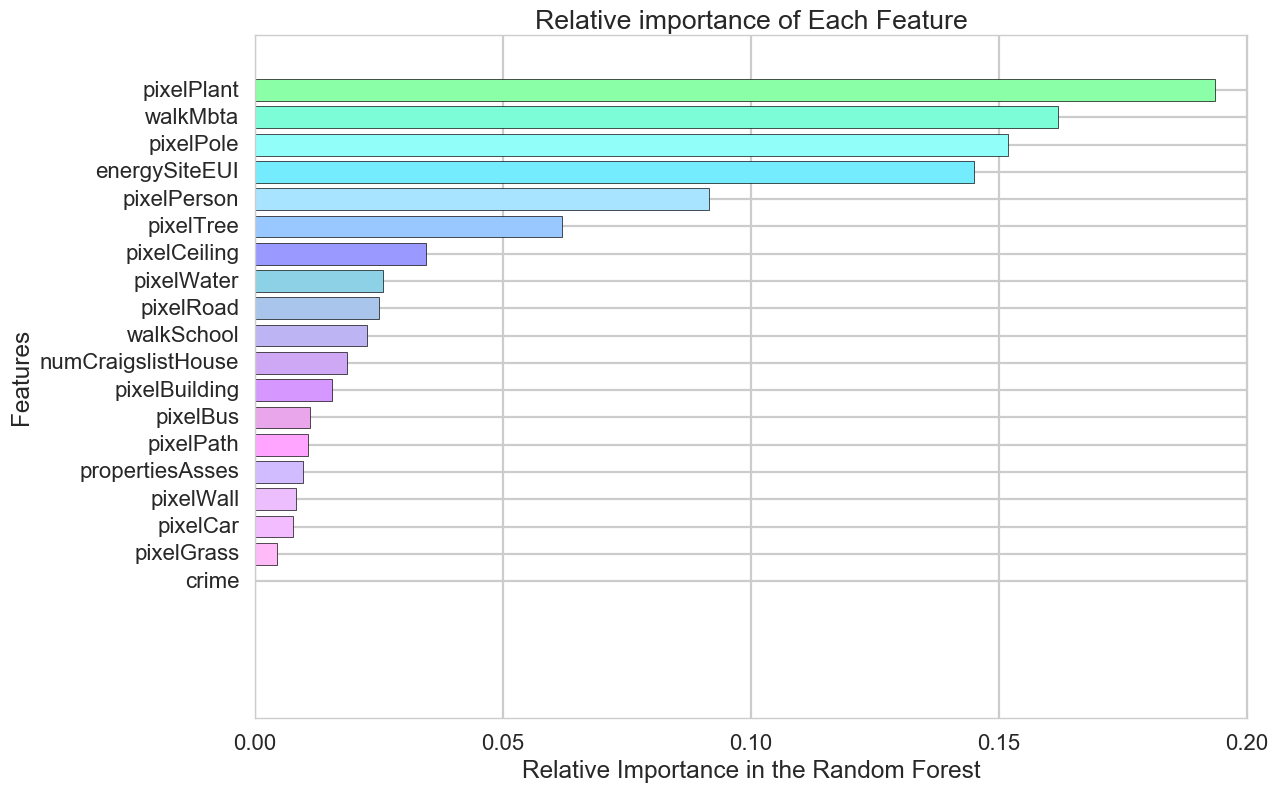

In [30]:
importance_list = clfForest.feature_importances_
print clfForest.feature_importances_
name_list = datacon.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
cmaps = ["#FFBBDD","#FFBBF7","#F2BCFE","#EDBEFE","#D0BCFE", "#FFA4FF", "#EAA6EA",
    "#D698FE", "#CEA8F4", "#BCB4F3","#A9C5EB","#8CD1E6","#9999FF","#99C7FF","#A8E4FF","#75ECFD","#92FEF9","#7DFDD7","#8BFEA8","#93EEAA",
"#A6CAA9","#AAFD8E","#6FFF44","#ABFF73","#FFFF84","#EEF093"]
plt.barh(range(len(name_list)),importance_list,align='center', color=cmaps)
plt.yticks(range(len(name_list)),name_list)

plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [31]:
clf=clfForest.fit(Xtrain, ytrain)

parameters = {"max_depth": [3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]} # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
clf, Xtrain, ytrain, Xtest, ytest = do_classify(clf, parameters, datacon, 
                                                     xIndex,'target', 1, 
                                                     mask=mask, n_jobs = 1, score_func = 'f1')
print clf.max_depth, clf.min_samples_leaf

C:\Users\EllieHan\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.60
Accuracy on test data:     0.59
[[1797  475]
 [1411  943]]
########################################################
3 4


In [32]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 30)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       datacon, xIndex, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)

    best = gs.best_estimator_
    return best

print cv_optimize(clfAda, parameters, Xtrain, ytrain, n_jobs=4, n_folds=5, score_func=None)

using mask


C:\Users\EllieHan\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


############# based on standard predict ################
Accuracy on training data: 0.66
Accuracy on test data:     0.66
[[1382  890]
 [ 682 1672]]
########################################################
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=11, random_state=None)


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(10, 30), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       datacon, xIndex, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

print cv_optimize(clfGB, parameters, Xtrain, ytrain, n_jobs=4, n_folds=5, score_func=None)

using mask


C:\Users\EllieHan\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


############# based on standard predict ################
Accuracy on training data: 0.63
Accuracy on test data:     0.64
[[1280  992]
 [ 672 1682]]
########################################################
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=10, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [34]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model


def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    

imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

[1 2 2 ..., 0 0 0] [1 2 2 ..., 0 0 0]
[[-71.06478   42.35855 ]
 [-71.070305  42.356533]
 [-71.06151   42.3554  ]
 ..., 
 [-70.94244   42.184357]
 [-70.957565  42.168148]
 [-70.956566  42.1862  ]]


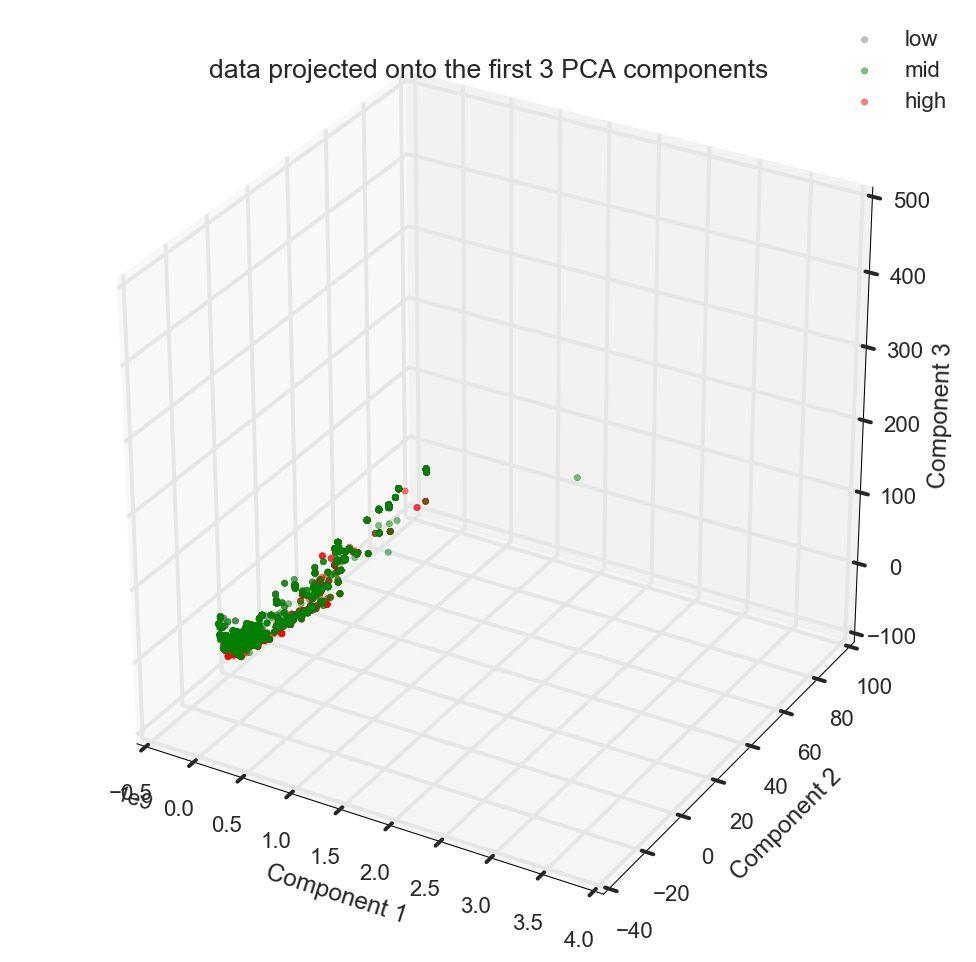

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors

Coor = datacon[['Longitude','Latitude']].values
Div = datacon['target'].values

# get X Y from the original data
xIndex = ['Latitude','Longitude','pixelWall' ,'propertiesAsses', 'pixelWater', 'pixelBus' ,'pixelCeiling',
 'pixelBuilding', 'crime', 'walkSchool' ,'walkMbta' ,'walkPark',
 'walkUniversity' ,'pixelBridge' ,'pixelField', 'pixelSky' ,'Longitude' ,'Zip',
 'RoomType', 'Bathrooms']
x = datacon[xIndex].values
y = datacon['target'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# x = data.values[:, :-1]
# y = data.values[:, -1]

print Div,y
print Coor

#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

# print pca.get_covariance()

#Visualized our reduced data
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], color='gray', label='low', alpha=0.5 )
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], color='g', label='mid', alpha=0.5 )
ax1.scatter(x_reduced[y==2, 0], x_reduced[y==2, 1], x_reduced[y==2, 2], color='r', label='high', alpha=0.5 )

ax1.set_xlabel('\n'+'\n' + 'Component 1')
ax1.set_ylabel('\n'+'\n' + 'Component 2')
ax1.set_zlabel('\n'+'\n' + 'Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

plt.tight_layout()
plt.show()

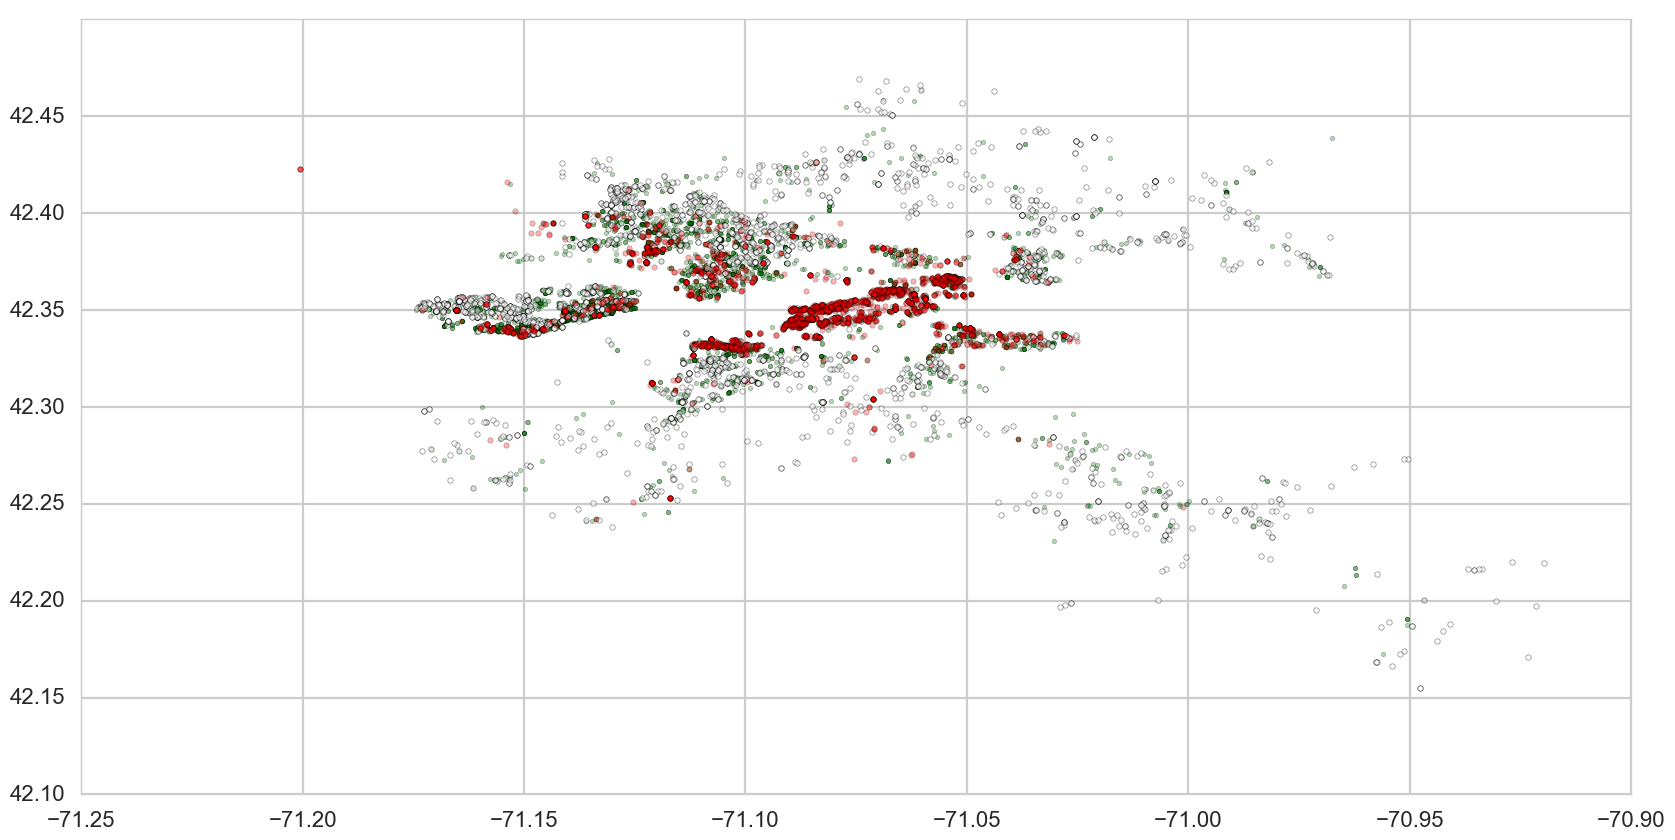

In [36]:
plt.figure(figsize=(20, 10))
plt.scatter(Coor[Div == 1, 0], Coor[Div == 1, 1], s=10, c='green', label='Mid',alpha=0.3 )
plt.scatter(Coor[Div == 0, 0], Coor[Div == 0, 1], s=15, c='white', label='Low',alpha=0.5 )
plt.scatter(Coor[Div == 2, 0], Coor[Div == 2, 1], s=15, c='red', label='High',alpha=0.3 )
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.linear_model import LogisticRegressionCV as LogRegCV
from sklearn.feature_extraction.text import CountVectorizer


x = datacon[xIndex].values
y = datacon['target'].values

###Build a classifier to distinguish between 0 and 1
# x = data.values[:, :-1]
# y = data.values[:, -1]

#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=5)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Remove all instances of class 2
x_binary = x_reduced[y != 2, :]

#Remove all instances of class 2
y_binary = y[y != 2]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg()
logistic_01.fit(x_binary, y_binary)

###Build a classifier to distinguish between 1 and 2

#Remove all instances of class 0
x_binary = x_reduced[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 2
logistic_12 = LogReg()
logistic_12.fit(x_binary, y_binary)

###Build a classifier to distinguish between 0 and 2

#Remove all instances of class 1
x_binary = x_reduced[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 2
logistic_02 = LogReg()
logistic_02.fit(x_binary, y_binary)


#Predict a label for our dataset using each binary classifier
y_pred_01 = logistic_01.predict(x_reduced)
y_pred_12 = logistic_12.predict(x_reduced)
y_pred_02 = logistic_02.predict(x_reduced)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_02 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_12 == 1, 1] += 1

#Votes for 2
y_votes[y_pred_02 == 2, 2] += 1
y_votes[y_pred_12 == 2, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1)

#Accuracy of our predictions
print 'Accuracy of combined model:', np.mean(y == y_pred)

Accuracy of combined model: 0.388101003113


In [38]:
from sklearn.ensemble import RandomForestClassifier
import StringIO

i = 2
clfForest = RandomForestClassifier( n_estimators=i, oob_score=True, max_features='auto')

subdf=datacon[xIndex]
X=subdf.values
y=(datacon['target'].values==1)*1

# TRAINING AND TESTING
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]

# FIT THE TREE 
clf=clfForest.fit(Xtrain, ytrain)

print clfForest.n_estimators

training_accuracy = clfForest.score(Xtrain, ytrain)
test_accuracy = clfForest.score(Xtest, ytest)
print "############# based on standard predict ################"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)
print confusion_matrix(ytest, clf.predict(Xtest))
print "########################################################"

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       datacon, xIndex, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

2
############# based on standard predict ################
Accuracy on training data: 0.89
Accuracy on test data:     0.75
[[1918  354]
 [ 804 1550]]
########################################################
using mask


C:\Users\EllieHan\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


############# based on standard predict ################
Accuracy on training data: 0.92
Accuracy on test data:     0.75
[[1727  545]
 [ 599 1755]]
########################################################


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

X_new = datacon[xIndex]
y_new = datacon["target"]

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.5, random_state=42)

# Create classifiers
lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=7)
clfAda = AdaBoostClassifier(n_estimators=10)
clfGB = GradientBoostingClassifier(n_estimators=11)

In [40]:

x_reduced = datacon[xIndex].values
y = datacon['target'].values

# pca = PCA(n_components=3)
# pca.fit(x)

#Project to the data onto the three axes
# x_reduced = pca.transform(x)

#Remove all instances of class 2
x_binary = x_reduced[y != 2, :]

#Remove all instances of class 2
y_binary = y[y != 2]

#Fit logistic regression model for 0 vs 1
rfc_01 = RandomForestClassifier()
rfc_01.fit(x_binary, y_binary)

###Build a classifier to distinguish between 1 and 2

#Remove all instances of class 0
x_binary = x_reduced[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 2
rfc_12 = RandomForestClassifier()
rfc_12.fit(x_binary, y_binary)

###Build a classifier to distinguish between 0 and 2

#Remove all instances of class 1
x_binary = x_reduced[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 2
rfc_02 = RandomForestClassifier()
rfc_02.fit(x_binary, y_binary)


#Predict a label for our dataset using each binary classifier
y_pred_01 = rfc_01.predict(x_reduced)
y_pred_12 = rfc_12.predict(x_reduced)
y_pred_02 = rfc_02.predict(x_reduced)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_02 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_12 == 1, 1] += 1

#Votes for 2
y_votes[y_pred_02 == 2, 2] += 1
y_votes[y_pred_12 == 2, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1)

#Accuracy of our predictions
print 'Accuracy of combined model:', np.mean(y == y_pred)

Accuracy of combined model: 0.944742303701


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn import svm

X_new = datacon[xIndex]
y_new = datacon["target"]

x_reduced = datacon[xIndex].values
y = datacon['target'].values

# pca = PCA(n_components=20)
# pca.fit(x)

# #Project to the data onto the three axes
# x_reduced = pca.transform(x)

#Remove all instances of class 2
x_binary = x_reduced[y != 2, :]

#Remove all instances of class 2
y_binary = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(x_binary, y_binary, test_size=0.5, random_state=42)

# Create classifiers
lr = LogisticRegression()
# svc = svm.SVC(C=1000, kernel='linear')
rfc = RandomForestClassifier(n_estimators=15)
clfAda = AdaBoostClassifier(n_estimators=30)
clfGB = GradientBoostingClassifier(n_estimators=30)

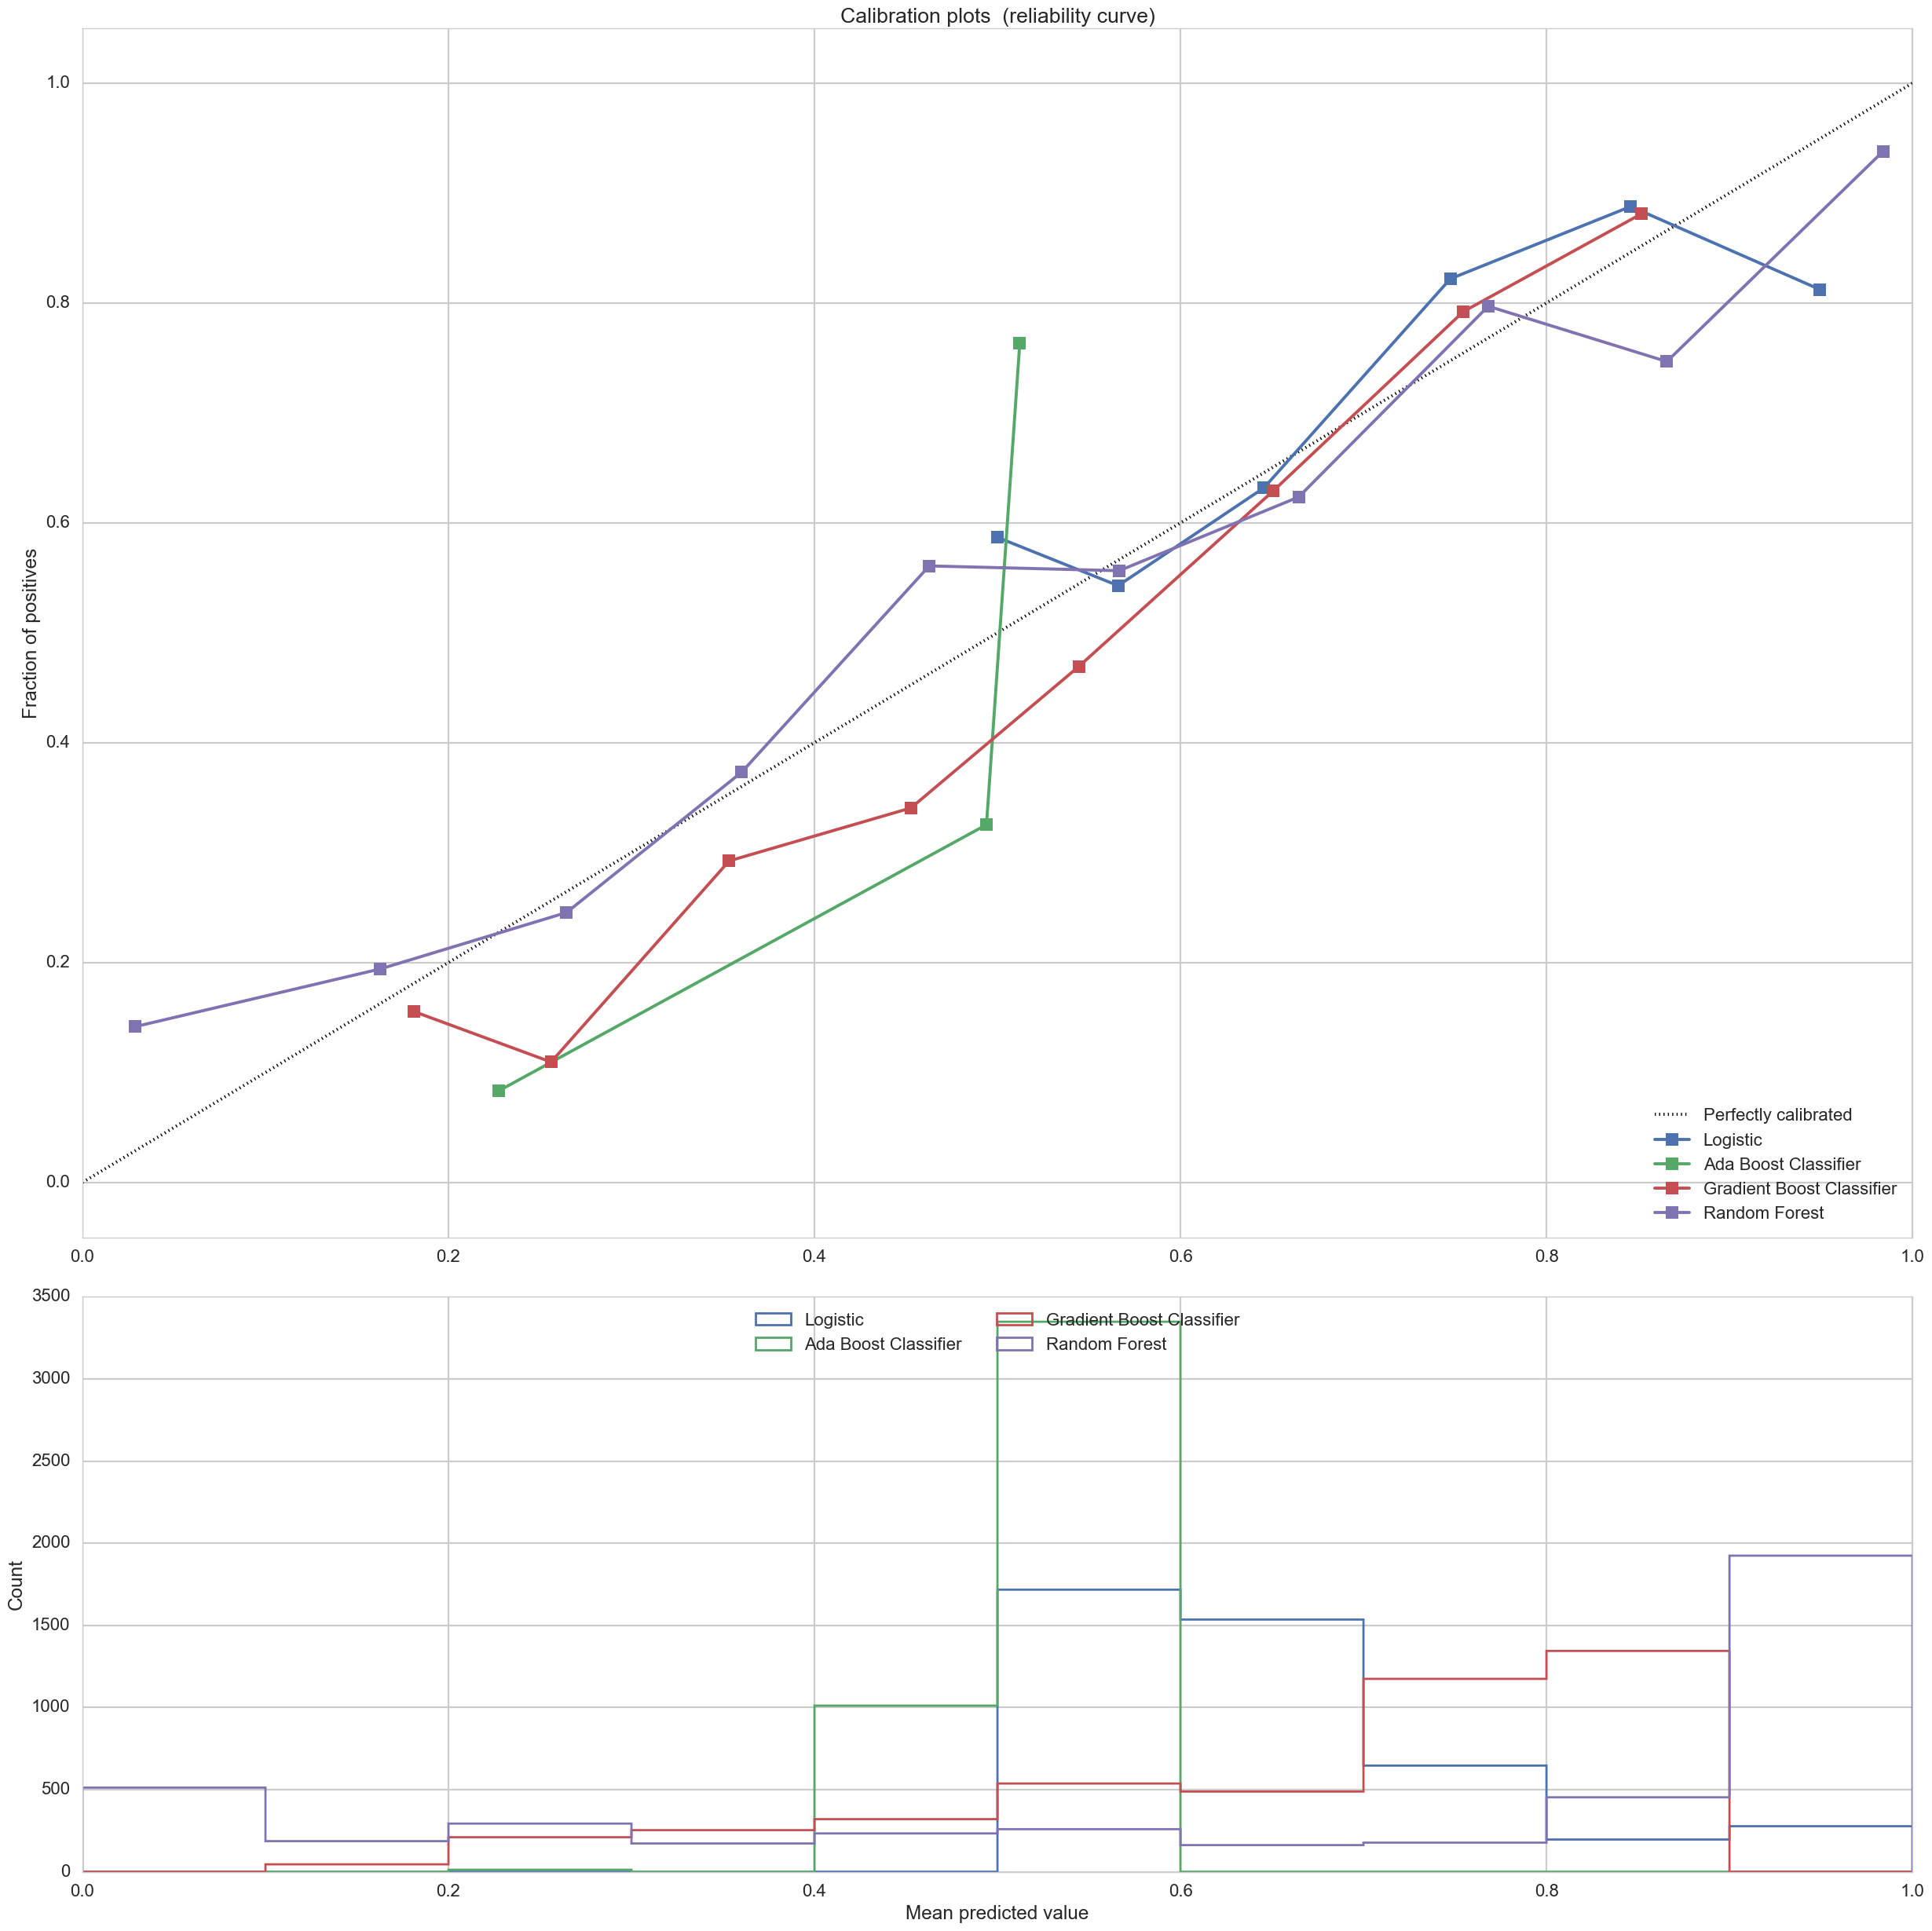

In [42]:
plt.figure(figsize=(25, 25))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
#                   (svc, 'Support Vector Classification'),
                  (clfAda, 'Ada Boost Classifier'),
                  (clfGB, 'Gradient Boost Classifier'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


X = X_train
y = y_train

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X, y)
print scores.mean()                             


clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print scores.mean()                             


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print scores.mean()


0.778950416296
0.796118547662
0.804120690695
